In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16 #32
plt.rcParams['xtick.labelsize'] = 16 #24
plt.rcParams['ytick.labelsize'] = 16 #24
plt.rcParams['legend.fontsize'] = 16 #32
plt.rcParams['text.usetex'] = True

In [2]:
from sklearn.svm import SVC

# filename = '/Users/roberto/data/RO-logging/2019-02-06-11-52-52/tmp_combined_data.csv';
# filename = '/Users/roberto/data/RO-logging/datasets/ro-eigenvecs/maxEVecs-ro-dataset.csv';
dateAndTime = "2019-03-18-15-00-42/";
filename = "/Users/roberto/data/odometry-comparisons/rugged_ro/"\
"2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"\
"motion_estimation/standard-ro/"+dateAndTime+'tmp_combined_data.csv';

print('Reading from: ' + filename)
df_combined_data = pd.read_csv(filename, names=range(2400))
df_maxEVecs = df_combined_data.iloc[:,1:] #pd.read_csv(filename, names=range(2400))

df_labels = df_combined_data.iloc[:,0:1]
labels = np.copy(df_labels.values)
labels = labels.T

[m,n] = shape(df_maxEVecs)

print("Shape of max eigenvecs is:\n",shape(df_maxEVecs))
print("Shape of labels is:\n",shape(df_labels))
print("Shape of data is:\n",shape(df_combined_data))

Reading from: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/2019-03-18-15-00-42/tmp_combined_data.csv
Shape of max eigenvecs is:
 (5955, 2399)
Shape of labels is:
 (5955, 1)
Shape of data is:
 (5955, 2400)


1265


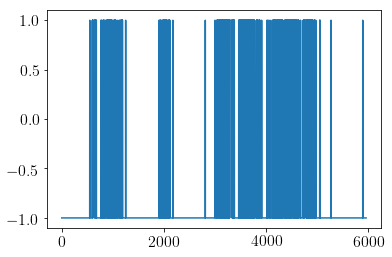

In [3]:
df_labels.head()
plt.plot(df_labels)
print(np.count_nonzero(df_labels+1))

In [4]:
# where_are_NaNs = isnan(df_maxEVecs)
# df_maxEVecs[where_are_NaNs] = 0.0
df_maxEVecs.head()

,1,2,3,4,5,6,7,8,9,10,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.026703,0.026701,0.026697,0.026691,0.026687,0.026681,0.026679,0.026677,0.026674,0.026669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026910,0.026902,0.026901,0.026898,0.026897,0.026897,0.026896,0.026896,0.026894,0.026894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.026918,0.026916,0.026915,0.026907,0.026903,0.026897,0.026897,0.026892,0.026891,0.026878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.026909,0.026903,0.026895,0.026891,0.026891,0.026887,0.026882,0.026847,0.026847,0.026846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.026921,0.026920,0.026919,0.026918,0.026880,0.026876,0.026875,0.026872,0.026871,0.026855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Handcrafted features for all data (train and test data)
eigenvectors = np.copy(df_maxEVecs.values)
max_vals = []
max_vals = eigenvectors[:,0]
num_landmarks = count_nonzero(eigenvectors,axis=1)
area_under_curve = []

for i in range(m): 
    temp_sum = 0;
    for j in range(n):
        temp_sum += eigenvectors[i,j]
    area_under_curve.append(temp_sum)
    
previous_max_vals = [max_vals[0]]
previous_max_vals = np.append(previous_max_vals,max_vals[0:m-1])
previous_num_landmarks = [num_landmarks[0]]
previous_num_landmarks = np.append(previous_num_landmarks,num_landmarks[0:m-1])
previous_area_under_curve = [area_under_curve[0]]
previous_area_under_curve = np.append(previous_area_under_curve,area_under_curve[0:m-1])

# tmp_max_vals = list(max_vals)
# tmp_previous_max_vals = list(previous_max_vals)
# tmp_num_landmarks = list(num_landmarks)
# tmp_previous_num_landmarks = list(previous_num_landmarks)
# tmp_area_under_curve = list(area_under_curve)
# tmp_previous_area_under_curve = list(previous_area_under_curve)

# max_vals = np.array(tmp_max_vals + tmp_previous_max_vals)
# previous_max_vals = np.array(tmp_previous_max_vals + tmp_max_vals)
# num_landmarks = np.array(tmp_num_landmarks + tmp_previous_num_landmarks)
# previous_num_landmarks = np.array(tmp_previous_num_landmarks + tmp_num_landmarks)
# area_under_curve = np.array(tmp_area_under_curve + tmp_previous_area_under_curve)
# previous_area_under_curve = np.array(tmp_previous_area_under_curve + tmp_area_under_curve)

print(len(max_vals))
# print(len(tmp_max_vals))

import random
random_noise = random.sample(range(1,100000),len(max_vals))

temp_dict = {'max_vals':max_vals,
             'num_landmarks':num_landmarks,
            'area_under_curve':area_under_curve,
            'previous_max_vals':previous_max_vals,
            'previous_num_landmarks':previous_num_landmarks,
            'previous_area_under_curve':previous_area_under_curve}
#             'random_noise':random_noise}

df_features = pd.DataFrame(data = temp_dict)
df_features.head()

5955


,max_vals,num_landmarks,area_under_curve,previous_max_vals,previous_num_landmarks,previous_area_under_curve
0,0.026703,1614,39.880415,0.026703,1614,39.880415
1,0.026910,1604,39.792908,0.026703,1614,39.880415
2,0.026918,1604,39.727950,0.026910,1604,39.792908
3,0.026909,1614,39.871966,0.026918,1604,39.727950
4,0.026921,1612,39.847845,0.026909,1614,39.871966


In [7]:
maxEVecs = list(df_maxEVecs.values)
maxEVecs = np.array(maxEVecs)
# maxEVecs = np.array(maxEVecs + maxEVecs)
y_labels = list(ravel(labels))
y_labels = np.array(y_labels)
# y_labels = np.array(y_labels + y_labels)
len(y_labels)

5955

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

print('Good RO: ',np.count_nonzero(y_labels==-1))
print('Bad RO:',np.count_nonzero(y_labels==1),'\n')

X_total = np.copy(df_features.values)
y_total = np.copy(y_labels)

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=0)

for train_index, test_index in sss.split(X_total, y_total):
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    eig_train, eig_test = maxEVecs[train_index], maxEVecs[test_index]

print('Good vs Bad RO in training: ',np.count_nonzero(y_train==-1),'good,',np.count_nonzero(y_train==1),'bad')
print('Good vs Bad RO in testing:',np.count_nonzero(y_test==-1),'good,',np.count_nonzero(y_test==1),'bad \n')

print('Good/Bad ratio in training: ',np.count_nonzero(y_train==-1)/np.count_nonzero(y_train==1))
print('Good/Bad ratio in testing:',np.count_nonzero(y_test==-1)/np.count_nonzero(y_test==1),'\n')

# print('Bad RO % in training: ',np.count_nonzero(y_train==1)/np.count_nonzero(labels==1))
# print('Bad RO % in testing:',np.count_nonzero(y_test==1)/np.count_nonzero(labels==1),'\n')

print('Bad RO % in training: ',np.count_nonzero(y_train==1)/len(y_train))
print('Bad RO % in testing:',np.count_nonzero(y_test==1)/len(y_test),'\n')

[m_train,n_train] = shape(X_train)
[m_test,n_test] = shape(X_test)
print("Size of training data is: \n",shape(X_train))
print("Size of test data is: \n",shape(X_test))

Good RO:  4690
Bad RO: 1265 

Good vs Bad RO in training:  3752 good, 1012 bad
Good vs Bad RO in testing: 938 good, 253 bad 

Good/Bad ratio in training:  3.707509881422925
Good/Bad ratio in testing: 3.707509881422925 

Bad RO % in training:  0.21242653232577666
Bad RO % in testing: 0.21242653232577666 

Size of training data is: 
 (4764, 6)
Size of test data is: 
 (1191, 6)


In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
# scaler = preprocessing.MaxAbsScaler().fit(X_train)
X_scaled = preprocessing.scale(X_train)
print("Mean: ",X_scaled.mean(axis=0))
print("Variance: ",X_scaled.std(axis=0))

Mean:  [ 1.86640049e-14 -1.43229024e-16  2.10218539e-14 -2.83358559e-15
 -2.17197284e-16  8.08864124e-15]
Variance:  [1. 1. 1. 1. 1. 1.]


In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
plot_fig = False
if(plot_fig == True):
    label_colours = []   
    test_colours = []
    for i in range(m_train):
        if(y_train[i] == 1):
            label_colours.append('red')
        else:
            label_colours.append('blue')
    for i in range(m_test):
        if(y_test[i] == 1):
            test_colours.append('red')
        else:
            test_colours.append('blue')

    plt.figure(figsize=(20,10))
    for i in range(300,600):
        plt.plot(X_train[i,:].T,color=label_colours[i],markersize=0.1);
        plt.plot(eig_train[i,:].T, color=label_colours[i],markersize=0.1);
        plt.title("Normalised eigenvector element magnitudes classified by odometry estimate",fontsize=32,y=1.03)

    line1, = plt.plot([],[],color='blue',label='Success')
    line2, = plt.plot([],[],color='red',label='Failure')
    plt.legend(handles=[line1,line2],fontsize=24)
    plt.xlabel('Element index',labelpad=10)
    plt.ylabel('Element magnitude',labelpad=10)

    # for i in range(m_train):
    #     plt.subplot(121)
    #     plt.plot(eig_train[i,:].T, color=label_colours[i]);
    #     plt.title("Training data", fontsize=16)

    # for i in range(m_test):
    #     plt.subplot(122)
    #     plt.plot(eig_test[i,:].T, color=test_colours[i]);
    #     plt.title("Test data", fontsize=16)
    plt.savefig("/Users/roberto/data/fig1.pdf",bbox_inches='tight',pad_inches = 0)

In [12]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# SVM Classifier model
# clf = RandomForestClassifier(n_estimators=30,class_weight='balanced')
# clf = SVC(kernel="rbf",class_weight='balanced', C=float(20),gamma=0.1,random_state=0)
clf = SVC(kernel="linear",class_weight='balanced', C=float(10),gamma=0.001,random_state=0)
print(clf.fit(X_train, y_train))
y_predictions = clf.predict(X_test)

print('Accuracy:',clf.score(X_test,y_test))
print('F1 score:',f1_score(y_predictions,y_test))

SVC(C=10.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
Accuracy: 0.7707808564231738
F1 score: 0.6305818673883626


In [13]:
from sklearn.feature_selection import RFE
clf_tmp = clf
selector = RFE(clf_tmp,1,step=1,verbose=1)
selector = selector.fit(X_train,y_train)
print(selector.ranking_)

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
[5 1 6 4 3 2]


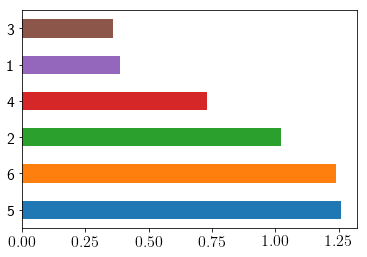

In [14]:
features_names = ['1', '2','3','4','5','6']

# clf_tmp = SVC(kernel="linear",class_weight='balanced', C=float(1),random_state=0)
# clf_tmp.fit(X_train, y_train)
pd.Series(abs(clf_tmp.coef_[0]), index=features_names).nlargest(6).plot(kind='barh')
# pd.Series(abs(svm.coef_[0])).nlargest(6).plot(kind='barh')


In [15]:
# print('Testing on X data with shape: ',shape(X_test))
# predictions = clf.predict(X_test)
# successes = 0
# for i in range(len(predictions)):
#     if predictions[i] == y_test[i]:
#         successes+=1   
# print('Successes: ',successes,' out of ',len(y_test))
# print('Classification accuracy = ',successes/len(y_test))

/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


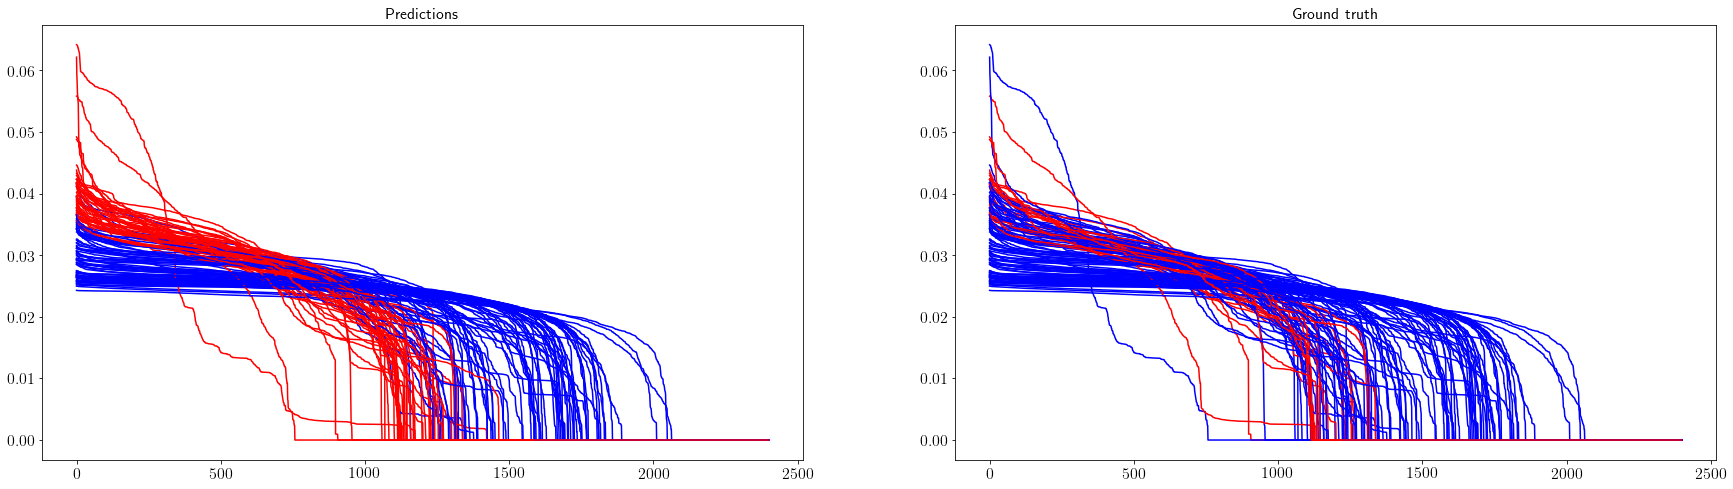

In [16]:
predict_colours = []
correct_colours = []
predictions = clf.predict(X_test)
for i in range(m_test):
    if(predictions[i] == 1):
        predict_colours.append('red')
    else:
        predict_colours.append('blue')
for i in range(m_test):
    if(y_test[i] == 1):
        correct_colours.append('red')
    else:
        correct_colours.append('blue')

plt.figure(figsize=(30,8))
for i in range(m_test):
    if(i%10 ==0):
        plt.subplot(121)
        plt.plot(eig_test[i,:].T, color=predict_colours[i]);
        plt.title("Predictions", fontsize=16)

        plt.subplot(122)
        plt.plot(eig_test[i,:].T, color=correct_colours[i]);
        plt.title("Ground truth", fontsize=16)

In [72]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
tmp_score = 'f1_micro'
scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring=tmp_score)
print(scores)
print('Mean F1 score:',scores.mean())

[0.77672956 0.79245283 0.76260504 0.78361345 0.78151261]
Mean F1 score: 0.7793826964748163


In [94]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
tmp_score = 'roc_auc'
scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring=tmp_score)
print(scores)
print('Mean roc_auc_score:',scores.mean())

[0.88969059 0.87464989 0.87530033 0.89506931 0.87522772]
Mean roc_auc_score: 0.8819875690000568


In [93]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
tmp_score = 'balanced_accuracy'
scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring=tmp_score)
print(scores)
print('Mean balanced_accuracy:',scores.mean())

[0.8276354  0.83043299 0.81858746 0.82830363 0.82154455]
Mean balanced_accuracy: 0.8253008063709035


In [149]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
tmp_score = 'average_precision'
scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring=tmp_score)
print(scores)
print('Mean average precision score:',scores.mean())

[0.59356545 0.55416798 0.56193251 0.62522248 0.62049942]
Mean average precision score: 0.5910775684425496


In [79]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics.scorer import make_scorer
scoring = ['precision_weighted', 'recall_weighted','f1_weighted']
# print(clf)

scores = cross_validate(clf,X_train,y_train, scoring=scoring,cv=5,return_train_score=False,return_estimator=True)
scores_df = pd.DataFrame(scores)

y_predictions = clf.predict(X_train)
print('Accuracy:',clf.score(X_train,y_train))
print('Precision:',precision_score(y_train,y_predictions,average='weighted'))
print('Recall:',recall_score(y_train,y_predictions,average='weighted'))
print('F1 score:',f1_score(y_train,y_predictions,average='weighted'))
scores_df

Accuracy: 0.7795969773299748
Precision: 0.8655029391848269
Recall: 0.7795969773299748
F1 score: 0.7981780225295606


,fit_time,score_time,estimator,test_precision_weighted,test_recall_weighted,test_f1_weighted
0,0.483127,0.039880,"SVC(C=10.0, cache_size=200, class_weight='bala...",0.867425,0.776730,0.795784
1,0.485719,0.040054,"SVC(C=10.0, cache_size=200, class_weight='bala...",0.867304,0.792453,0.809231
2,0.503588,0.042307,"SVC(C=10.0, cache_size=200, class_weight='bala...",0.863444,0.762605,0.783420
3,0.512768,0.042618,"SVC(C=10.0, cache_size=200, class_weight='bala...",0.867042,0.783613,0.801744
4,0.539643,0.045236,"SVC(C=10.0, cache_size=200, class_weight='bala...",0.862592,0.781513,0.799645


In [86]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics.scorer import make_scorer
scoring = ['precision_micro', 'recall_micro','f1_micro']
# print(clf)

scores = cross_validate(clf,X_train,y_train, scoring=scoring,cv=5,return_train_score=False,return_estimator=True)
scores_df = pd.DataFrame(scores)

y_predictions = clf.predict(X_train)
print('Accuracy:',clf.score(X_train,y_train))
print('Precision:',precision_score(y_train,y_predictions,average='micro'))
print('Recall:',recall_score(y_train,y_predictions,average='micro'))
print('\nF1 binary score:',f1_score(y_train,y_predictions,average='binary'))
print('F1 micro score:',f1_score(y_train,y_predictions,average='micro'))
print('F1 macro score:',f1_score(y_train,y_predictions,average='macro'))
print('F1 weighted score:',f1_score(y_train,y_predictions,average='weighted'))

scores_df

Accuracy: 0.7795969773299748
Precision: 0.7795969773299748
Recall: 0.7795969773299748

F1 binary score: 0.6356696738376129
F1 micro score: 0.7795969773299748
F1 macro score: 0.7388399527779699
F1 weighted score: 0.7981780225295606


,fit_time,score_time,estimator,test_precision_micro,test_recall_micro,test_f1_micro
0,0.493387,0.046304,"SVC(C=10.0, cache_size=200, class_weight='bala...",0.776730,0.776730,0.776730
1,0.501876,0.046895,"SVC(C=10.0, cache_size=200, class_weight='bala...",0.792453,0.792453,0.792453
2,0.516579,0.044965,"SVC(C=10.0, cache_size=200, class_weight='bala...",0.762605,0.762605,0.762605
3,0.526428,0.048943,"SVC(C=10.0, cache_size=200, class_weight='bala...",0.783613,0.783613,0.783613
4,0.566129,0.041751,"SVC(C=10.0, cache_size=200, class_weight='bala...",0.781513,0.781513,0.781513


In [97]:
y_predictions = clf.predict(X_train)
print('Accuracy:',clf.score(X_train,y_train))
print('Precision:',precision_score(y_train,y_predictions))
print('Recall:',recall_score(y_train,y_predictions))
print('F1 score:',f1_score(y_train,y_predictions))

Accuracy: 0.7795969773299748
Precision: 0.4898395721925134
Recall: 0.9051383399209486
F1 score: 0.6356696738376129


Area under PR curve: 0.5861534381691227
Average precision score: 0.5866980066927523


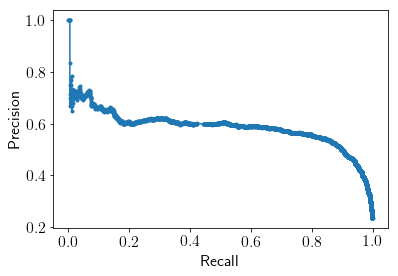

In [151]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
clf_probs = SVC(kernel="linear",class_weight='balanced', C=float(10),gamma=0.001,random_state=0,probability=True)
clf_probs.fit(X_train,y_train)
probs = clf_probs.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, probs)
print('Area under PR curve:',auc(recall,precision))
print('Average precision score:',average_precision_score(y_train, probs))
# plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [81]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf,X_train, y_train, cv=5)

(0, 200)

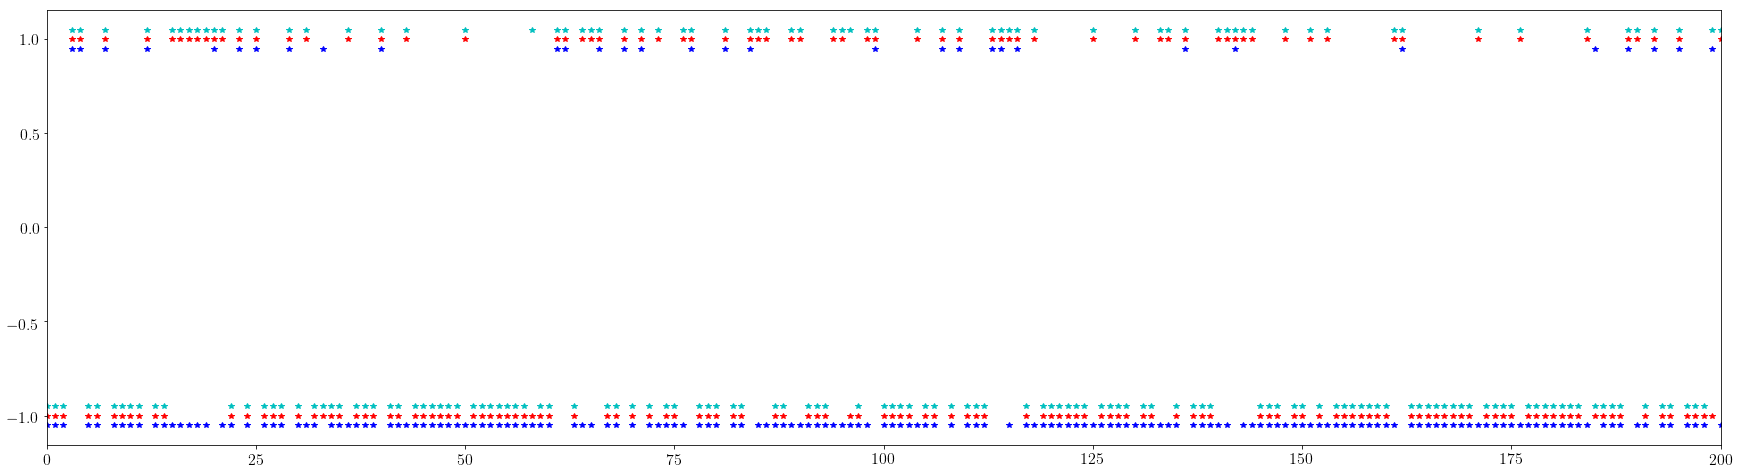

In [82]:
plt.figure(figsize=(30,8))
plt.plot(y_predictions,'r*')
plt.plot(y_train-0.05,'b*')
plt.plot(y_train_pred+0.05,'c*')

plt.xlim(0,200)

In [31]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf,X_train, y_train, cv=5)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[2797,  955],
       [  96,  916]])

In [33]:
from sklearn.metrics import precision_score, recall_score
print('Precision (% when positive prediction is correct):\n',precision_score(y_train,y_train_pred),'\n')
print('Recall (% of bad RO instances detected):\n',recall_score(y_train, y_train_pred),'\n')
print('F1 score: \n',f1_score(y_train,y_train_pred))

Precision (% when positive prediction is correct):
 0.48957776590058794 

Recall (% of bad RO instances detected):
 0.9051383399209486 

F1 score: 
 0.6354491848768644


In [129]:
from sklearn.model_selection import cross_val_score
# y_scores = cross_val_predict(clf, X_train, y_train, cv=5,
#                                  method="decision_function")
# y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
y_scores = clf_probs.predict_proba(X_train)
y_scores = y_scores[:, 1]

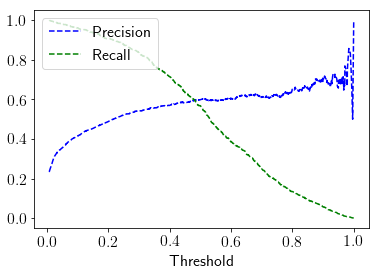

*** If we set a threshold here: ***
Precision (% when positive prediction is correct):
 0.520870076425632 

Recall (% of bad RO instances detected):
 0.8754940711462451 



In [140]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
#     plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Need to set all bad RO labels from -1 to 0 for this function to work
tmp_y_train = np.array(y_train)
indices = [i for i, x in enumerate(tmp_y_train) if x == -1]
tmp_y_train[indices] = 0

y_train_pred_thresholding = (y_scores > 0.25)
print('*** If we set a threshold here: ***')
print('Precision (% when positive prediction is correct):\n',
      precision_score(tmp_y_train,y_train_pred_thresholding),'\n')
print('Recall (% of bad RO instances detected):\n',
      recall_score(tmp_y_train, y_train_pred_thresholding),'\n')

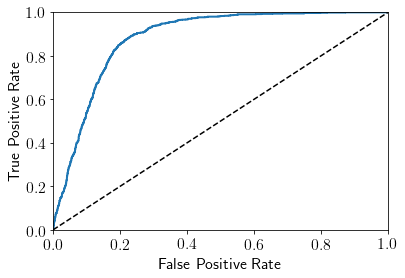

Area under ROC curve 0.8813539234937677


In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

print('Area under ROC curve',roc_auc_score(y_train, y_scores))

In [37]:
import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
sys.path.append("/Users/roberto/code/corelibs/src/tools-python")
sys.path.append("/Users/roberto/code/corelibs/build/datatypes")
sys.path.append("/Users/roberto/code/corelibs/build/datatypes/datatypes_python")
import module

from mrg.logging import IndexedMonolithic #MonolithicDecoder
# sys.path.append("/Users/roberto/code/radar-utilities/build/radarutilities_datatypes_python")
# sys.path.append("/Users/roberto/code/radar-utilities/build/radarutilities_datatypes_python/protobuf/")

# for p in sys.path:
#     print(p)

from protobuf.classification_score import pbClassificationScore_pb2
classification_file = "/Users/roberto/data/odometry-comparisons/"\
"rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"\
"motion_estimation/ground-truth/labels.monolithic"

mono_decoder = IndexedMonolithic(classification_file) #MonolithicDecoder(classification_file)
classification_scores = []
classification_timestamps = []

for pb, _, _ in mono_decoder:
    timestamp = pb.timestamp
    classification_score = pb.score
    classification_scores.append(classification_score)
    classification_timestamps.append(timestamp)
print("Finished importing ground truth labels.")
print("Size of imported labels is:",len(classification_scores))

# classification_scores, timestamps  = map(list, zip(*[pb.score, pb.timestamp for pb, _, _ in mono_decoder]))
# classification_timestamps = [pb.timestamp for pb, _, _ in mono_decoder]

importing  protobuf.logging.pbMonolithicIndexArray_pb2
importing  protobuf.classification_score.pbClassificationScore_pb2
Finished importing ground truth labels.
Size of imported labels is: 5955


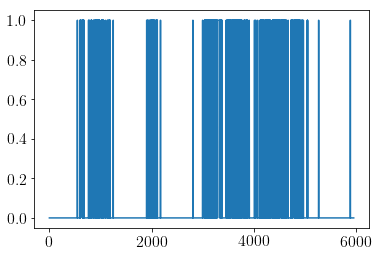

In [38]:
import matplotlib.pyplot as plt
plt.plot(classification_scores)
plt.show()

In [39]:
X_experiment = np.copy(df_features.values)
X_experiment = preprocessing.scale(X_experiment)
predictions = clf.predict(X_experiment)
for i in range(len(predictions)):
    if predictions[i] == -1:
        predictions[i] = 0

Ground truth failures:  1265
Predicted failures:  2343
True positives:  1148
False positives:  1195
True negatives:  3495
False negatives:  117
True positives:  1148
Confusion matrix:
 3495   1195 
 117   3495
Precision: 0.4899701237729407
Recall: 0.9075098814229249
F1 score: 0.6363636363636364


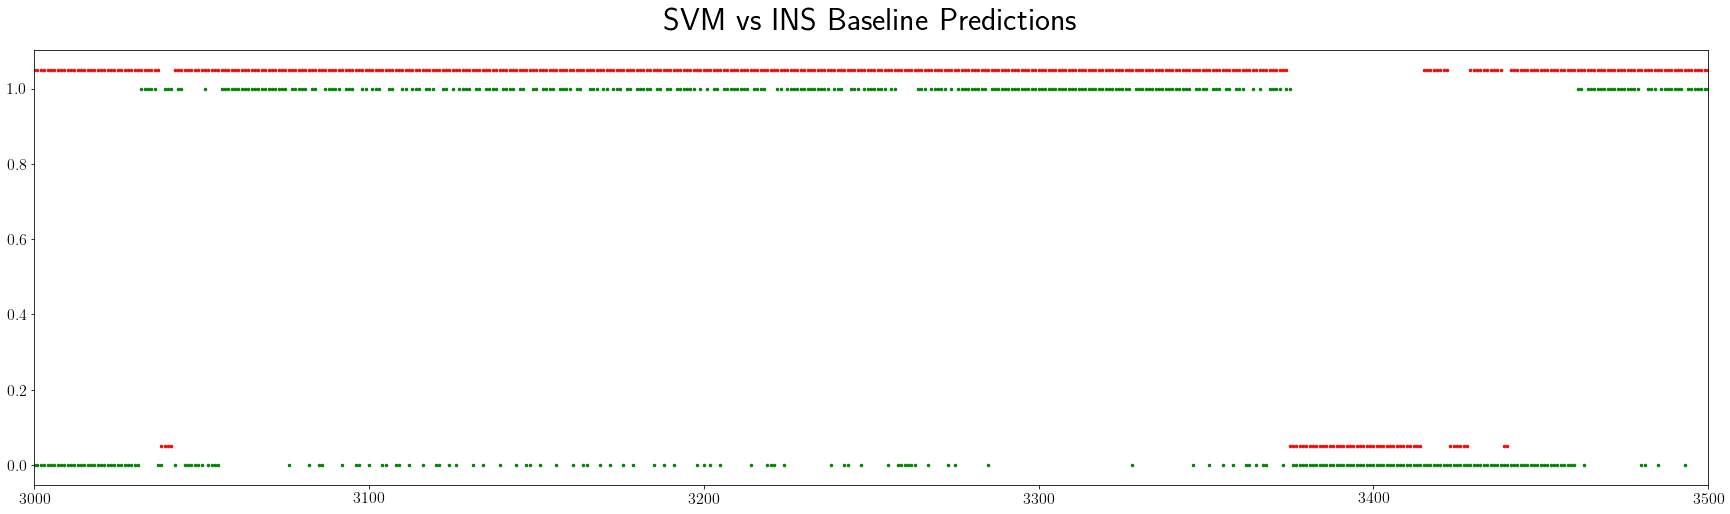

In [87]:
plt.figure(figsize=(30,8))
plt.plot(classification_scores,'g.',markersize=5)
plt.plot([x+0.05 for x in predictions],'r.',markersize=5)
plt.xlim(3000,3500)
plt.title("SVM vs INS Baseline Predictions",fontsize=32,y=1.03)


TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(classification_scores)):
    if(classification_scores[i] == 1 and predictions[i] == 1):
        TP += 1
    elif(classification_scores[i] == 0 and predictions[i] == 1):
        FP += 1
    elif(classification_scores[i] == 0 and predictions[i] == 0):
        TN += 1
    else:
        FN += 1
print("Ground truth failures: ", count_nonzero(classification_scores))
print("Predicted failures: ", count_nonzero(predictions))
print("True positives: ", TP)
print("False positives: ", FP)
print("True negatives: ", TN)
print("False negatives: ", FN)
print("True positives: ", TP)
print("Confusion matrix:\n", TN," ",FP,"\n",FN," ",TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",2*(precision*recall)/(precision+recall))

In [41]:
# from matplotlib import pyplot as plt
# from sklearn import svm
# def f_importances(coef, names):
#     imp = coef
#     imp,names = zip(*sorted(zip(imp,names)))
#     plt.barh(range(len(names)), imp, align='center')
#     plt.yticks(range(len(names)), names)
#     plt.show()

# features_names = ['input1', 'input2']
# svm = svm.SVC(kernel='linear')
# svm.fit(X_train, y_train)
# plt.plot(abs(svm.coef_).T,'*--')
# f_importances(svm.coef_, features_names)

Ground truth failures:  1391
Predicted failures:  2343
True positives:  1284
False positives:  1059
True negatives:  3505
False negatives:  107
True positives:  1284
Confusion matrix:
 3505   1059 
 107   3505
Precision: 0.5480153649167734
Recall: 0.9230769230769231
F1 score: 0.6877343331547938


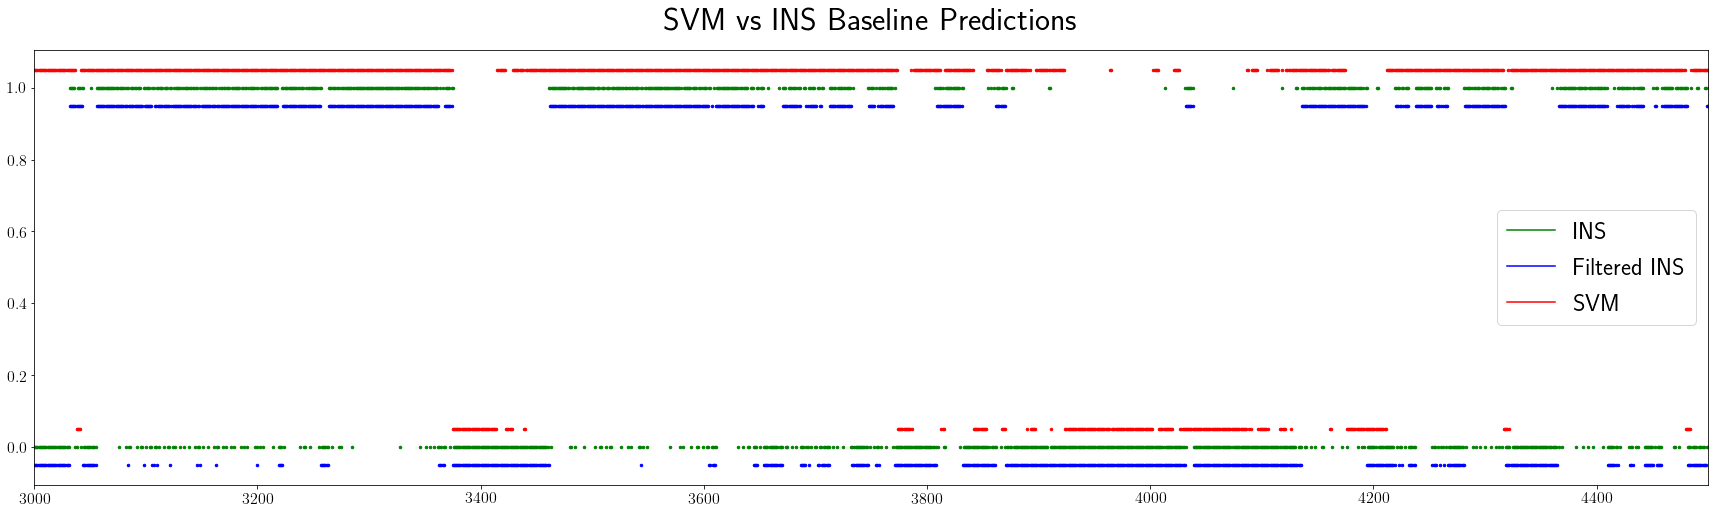

In [114]:
import scipy.signal
tmp_gt = np.array(classification_scores)
tmp_gt = scipy.signal.medfilt(tmp_gt,5)

plt.figure(figsize=(30,8))
plt.plot(classification_scores,'g.',markersize=5)
plt.plot([x-0.05 for x in tmp_gt],'b.',markersize=5)
plt.plot([x+0.05 for x in predictions],'r.',markersize=5)
plt.xlim(3000,4500)
plt.title("SVM vs INS Baseline Predictions",fontsize=32,y=1.03)
line1, = plt.plot([],[],color='green',label='INS')
line2, = plt.plot([],[],color='blue',label='Filtered INS')
line3, = plt.plot([],[],color='red',label='SVM')
plt.legend(handles=[line1,line2,line3],fontsize=24,loc='right')
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(classification_scores)):
    if(tmp_gt[i] == 1 and predictions[i] == 1):
        TP += 1
    elif(tmp_gt[i] == 0 and predictions[i] == 1):
        FP += 1
    elif(tmp_gt[i] == 0 and predictions[i] == 0):
        TN += 1
    else:
        FN += 1
print("Ground truth failures: ", count_nonzero(tmp_gt))
print("Predicted failures: ", count_nonzero(predictions))
print("True positives: ", TP)
print("False positives: ", FP)
print("True negatives: ", TN)
print("False negatives: ", FN)
print("True positives: ", TP)
print("Confusion matrix:\n", TN," ",FP,"\n",FN," ",TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",2*(precision*recall)/(precision+recall))

In [144]:
X_experiment = np.copy(df_features.values)
X_experiment = preprocessing.scale(X_experiment)
predictions = clf.predict(X_experiment)
for i in range(len(predictions)):
    if predictions[i] == -1:
        predictions[i] = 0
y_train_pred_thresholding = (predictions > -0.5)

Area under PR curve: 0.6590249670066106
Average precision score: 0.6597149167719648


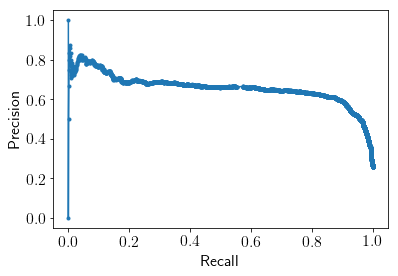

In [146]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
clf_probs = SVC(kernel="linear",class_weight='balanced', C=float(10),gamma=0.001,random_state=0,probability=True)
clf_probs.fit(X_experiment,tmp_gt)
probs = clf_probs.predict_proba(X_experiment)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(tmp_gt, probs)
print('Area under PR curve:',auc(recall,precision))
print('Average precision score:',average_precision_score(tmp_gt, probs))
# plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()